In [13]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
from IPython.display import Image, HTML

#import Utilities as ut

%matplotlib inline

import statsmodels.api as sm

def centerAxes(ax):
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    bounds = np.array([ax.axes.get_xlim(), ax.axes.get_ylim()])
    ax.plot(bounds[0][0],bounds[1][0],'')
    ax.plot(bounds[0][1],bounds[1][1],'')

ModuleNotFoundError: No module named 'Utilities'

In 1886 Francis Galton published his observations about how random factors affect outliers.

This notion has come to be called “regression to the mean” because unusually large or small phenomena, after the influence of random events, become closer to their mean values (less extreme).

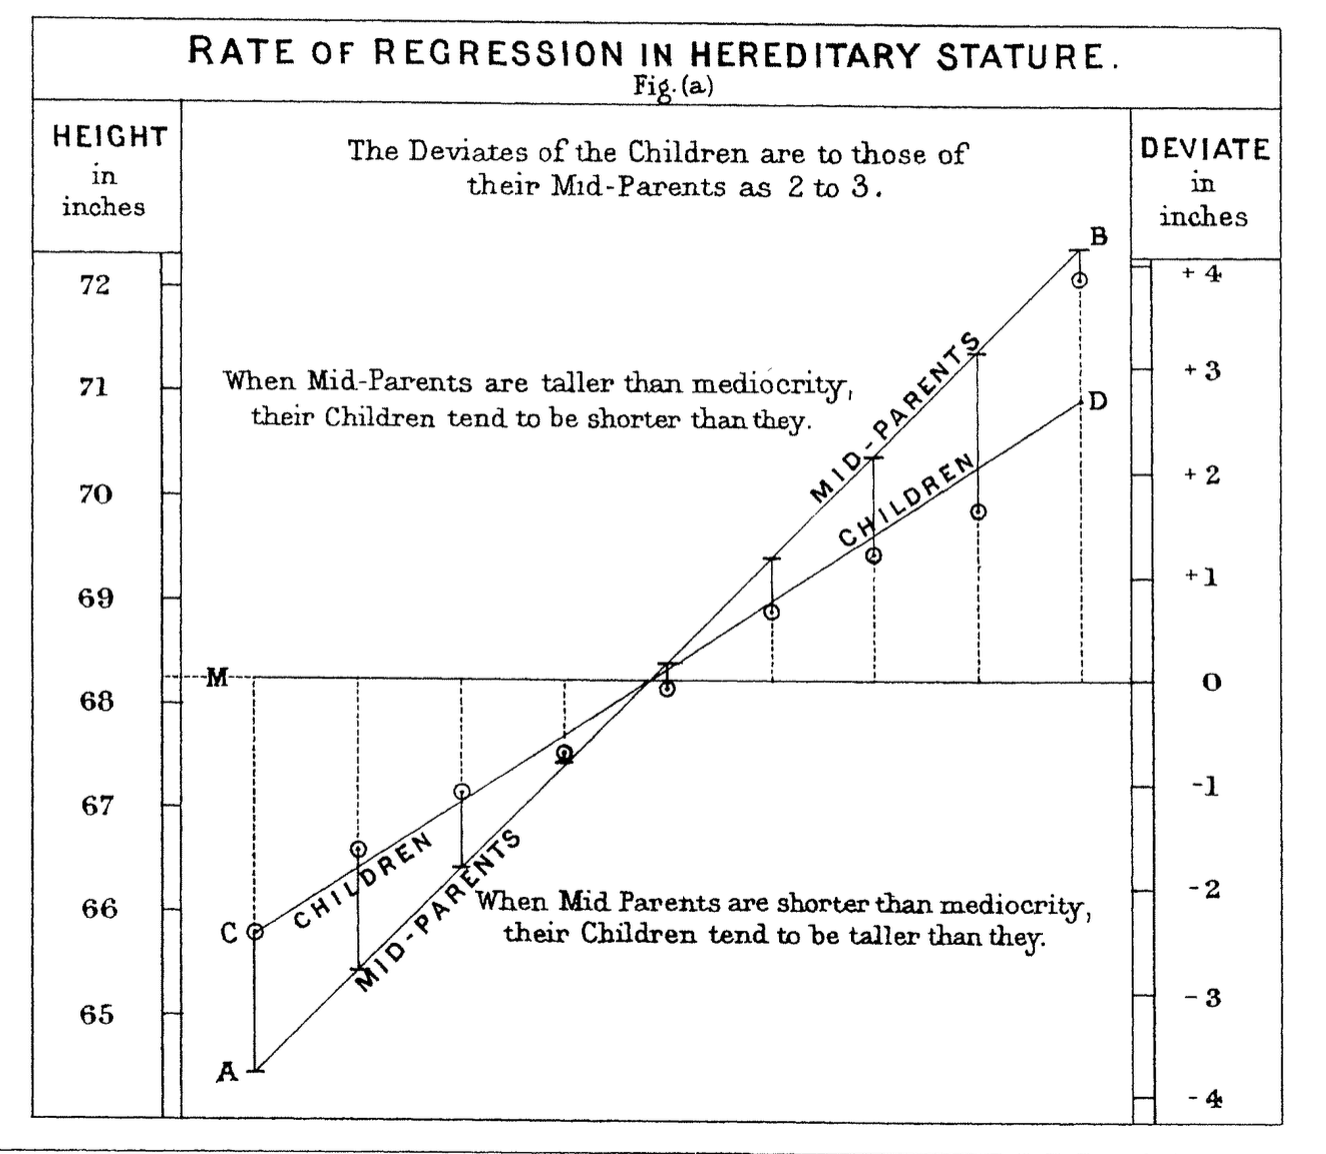

Galton fit a straight line to this effect, and the fitting of lines or curves to data has come to be called regression as well.

The most common form of machine learning is regression, which means constructing an equation that describes the relationships among variables.

It is a form of supervised learning: whereas classification deals with predicting categorical features (labels or classes), regression deals with predicting continuous features (real values).

For example, we may look at these points and decide to model them using a line.

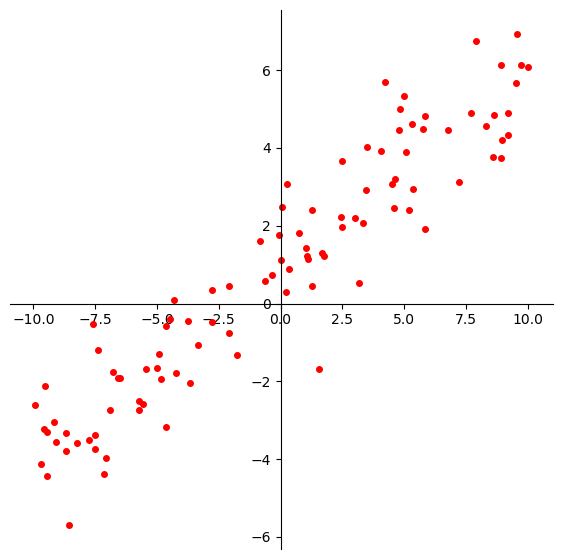

In [3]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0] + (line[1] * xlin) + np.random.randn(100)
ax.plot(xlin, ylin, 'ro', markersize = 4);

We may look at these points and decide to model them using a quadratic function.

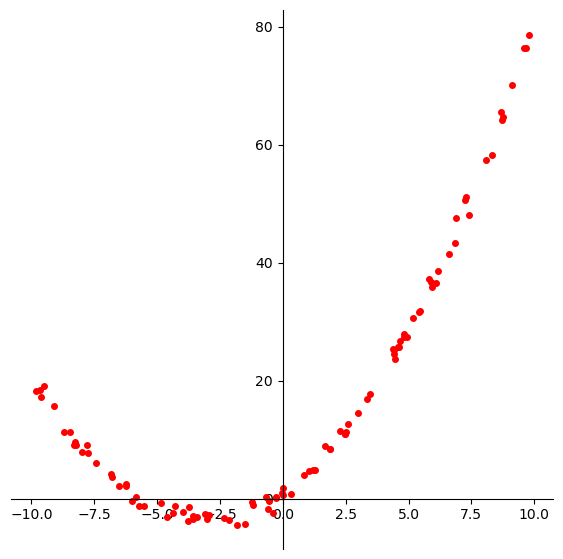

In [4]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
quad = np.array([1, 3, 0.5])
xquad = -10.0 + 20.0 * np.random.random(100)
yquad = quad[0] + (quad[1] * xquad) + (quad[2] * xquad * xquad) + np.random.randn(100)
ax.plot(xquad, yquad, 'ro', markersize = 4);

And we may look at these points and decide to model them using a logarithmic function.

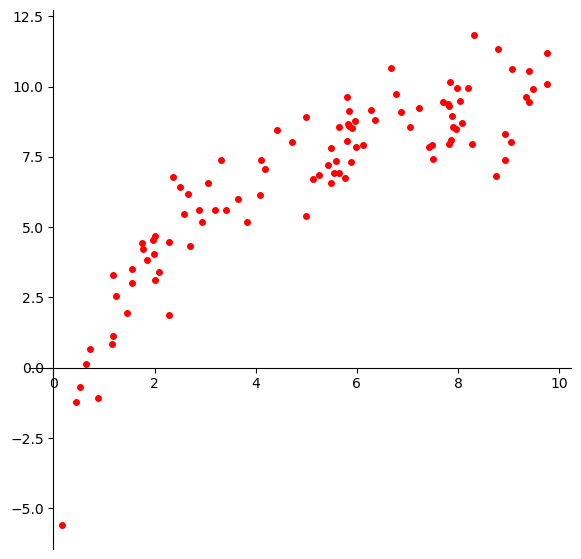

In [5]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
log = np.array([1, 4])
xlog = 10.0 * np.random.random(100)
ylog = log[0] + log[1] * np.log(xlog) + np.random.randn(100)
ax.plot(xlog, ylog, 'ro', markersize=4);

Clearly, none of these datasets agrees perfectly with the proposed model. So the question arises:

How do we find the best linear function (or quadratic function, or logarithmic function) given the data?

Framework.

This problem has been studied extensively in the field of statistics. Certain terminology is used:

- Some values are referred to as “independent,” and

- Some values are referred to as “dependent.”

The basic regression task is:

- given a set of independent variables

- and the associated dependent variables,

- estimate the parameters of a model (such as a line, parabola, etc) that describes how the dependent variables are related to the independent variables.

The independent variables are collected into a matrix $X$ which is called the **design matrix**.

The dependent variables are collected into an **observation** vector $y$.  

The parameters of the model (for any kind of model) are collected into a parameter vector $\beta$

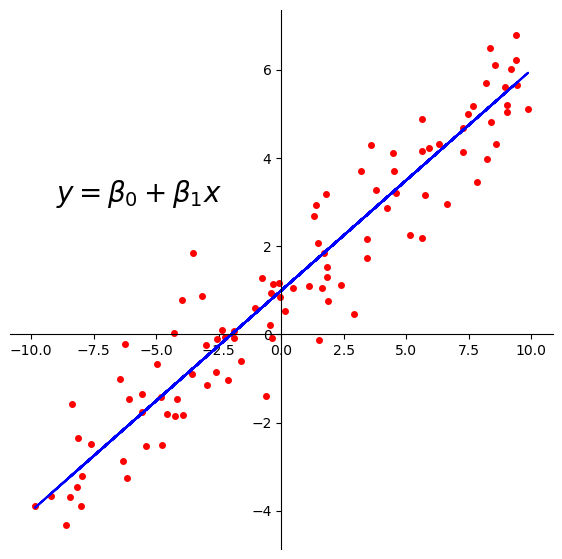

In [6]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0] + (line[1] * xlin) + np.random.randn(100)
ax.plot(xlin, ylin, 'ro', markersize = 4)
ax.plot(xlin, line[0] + line[1] * xlin, 'b-')
plt.text(-9, 3, r'$y = \beta_0 + \beta_1x$', size=20);

### Least-Squares Lines

The first kind of model we’ll study is a linear equation, $y = \beta_0 + \beta_1 x$.

Experimental data often produce points $(x_1, y_1), \dots, (x_n, y_n)$ that seem to lie close to a line.

We want to determine the parameters $\beta_0, \beta_1$ that define a line that is as "close" to the points as possible.

Suppose we have a line $y = \beta_0 + \beta_1 x$. For each data point $(x_j, y_j)$, there is a point $(x_j, \beta_0 + \beta_1 x_j)$ that is the point on the line with the same $x$-coordinate.

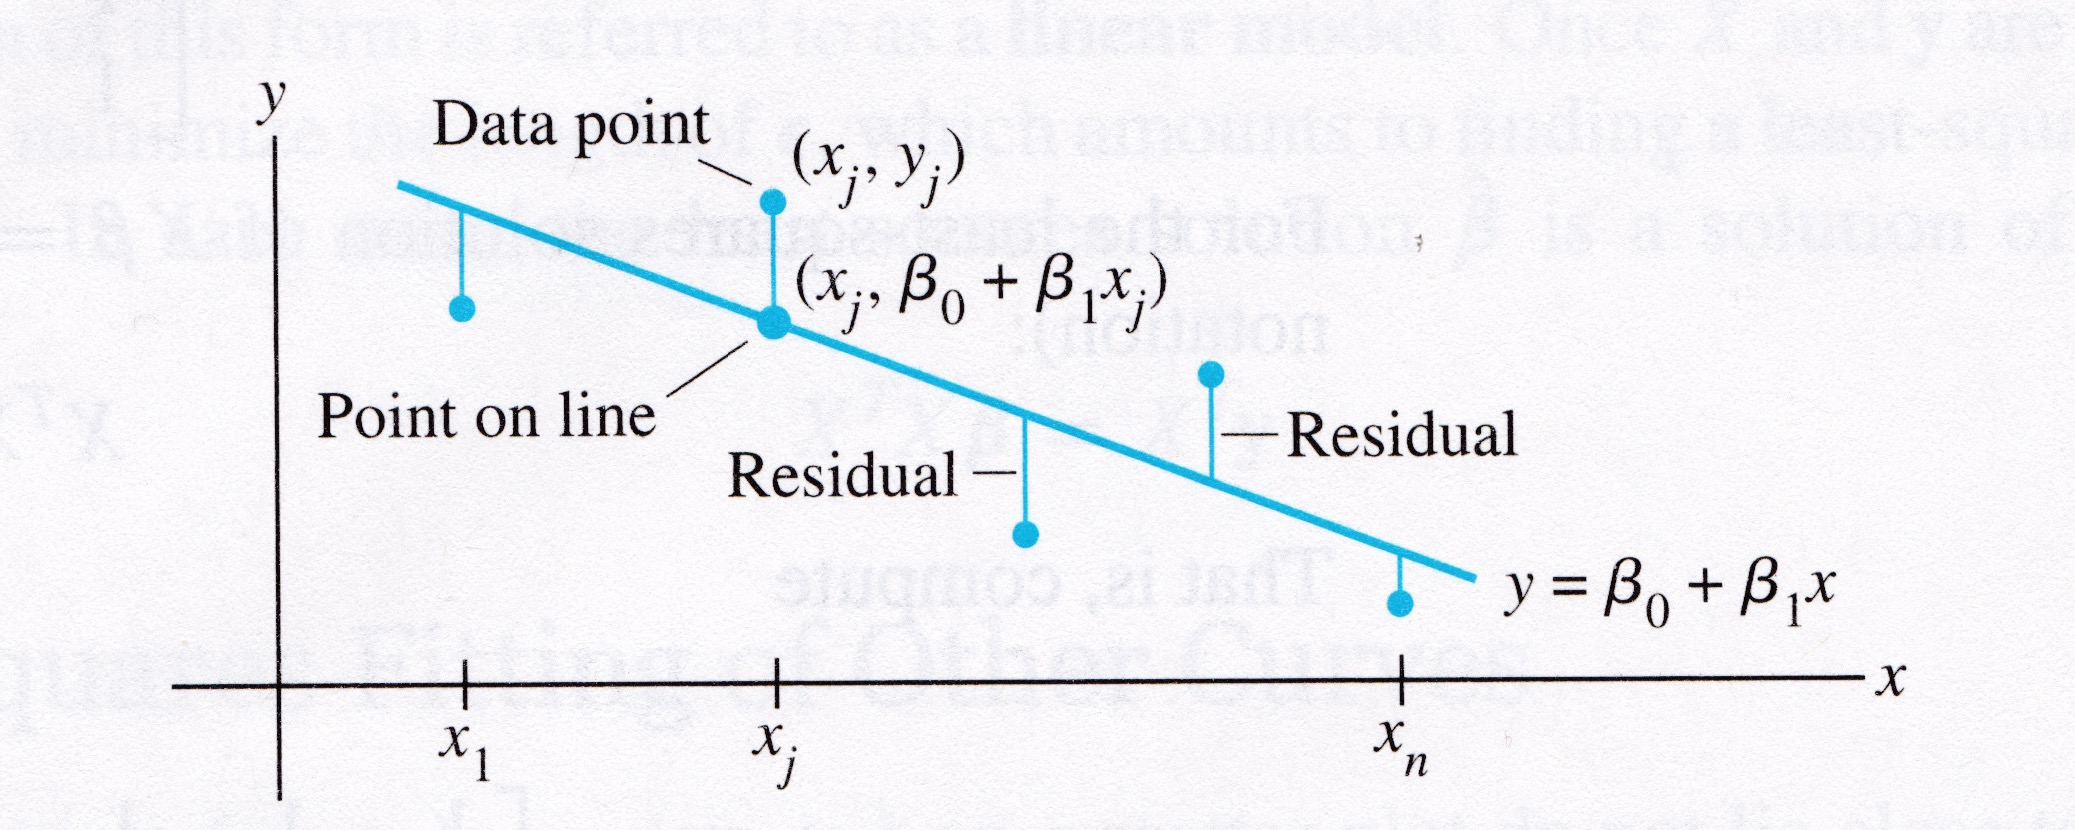

We call:
- $y_j$ the **observed** value of $y$
- $\beta_0 + \beta_1 x_j$ the **predicted** $y$-value.

The difference between an observed $y$-value and a predicted $y$-value is called a **residual**.

There are several ways to measure how "close" the line is to the data.

The usual choice is to sum the squares of the residuals.

The **least-squares line** is the line $y = \beta_0 + \beta_1 x$ that minimizes the sum of squares of the residuals.

The coefficients $\beta_0, \beta_1$ of the line are called **regression coefficients**.

#### A least-squares problem

If the data points were on the line, the parameters $\beta_0$ and $\beta_1$ would satisfy the equations:

$$
\beta_0 + \beta_1 x_1 = y_1
$$
$$
\beta_0 + \beta_1 x_2 = y_2
$$
$$
\beta_0 + \beta_1 x_3 = y_3
$$
$$
\vdots
$$
$$
\beta_0 + \beta_1 x_n = y_n
$$

We can write this system as:

$$
X \beta = y
$$

where

$$
X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}, \quad
\beta = \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}, \quad
y = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_n \end{bmatrix}
$$

Of course, if the data points don’t actually lie exactly on a line, there are no parameters $\beta_0, \beta_1$ for which the predicted $y$-values in $X\beta$ equal the observed $y$-values in $y$, and $X\beta = y$ has no solution.

Now, since the data doesn’t fall exactly on a line, we have decided to seek the $\beta$ that minimizes the sum of squared residuals, i.e.,

$$
\sum_i (\beta_0 + \beta_1 x_i - y_i)^2
$$

which equals

$$
\| X\beta - y \|^2
$$

This is key: **the sum of squares of the residuals is exactly the square of the distance between the vectors** $X \beta$ and $y$.

Computing the least-squares solution of $X\beta = y$ is equivalent to finding the $\beta$ that determines the least squares line. 

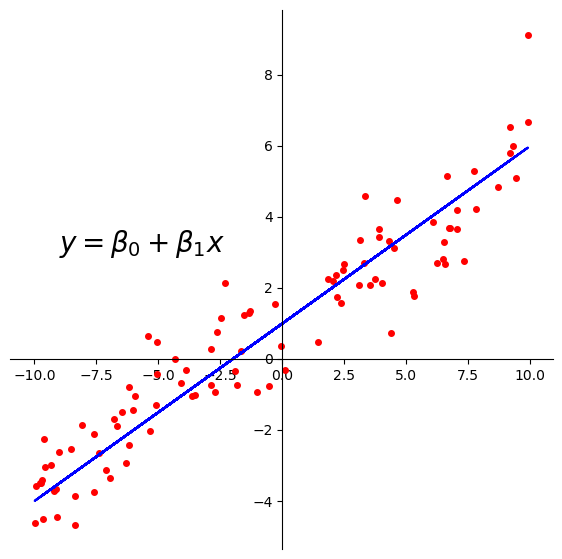

In [8]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0] + (line[1] * xlin) + np.random.randn(100)
ax.plot(xlin, ylin, 'ro', markersize = 4)
ax.plot(xlin, line[0] + line[1] * xlin, 'b-')
plt.text(-9, 3, r'$y = \beta_0 + \beta_1x$', size=20);

Now, to obtain the least-squares line, find the least-squares solution to $X \beta = y$.

From linear algebra, we know that the least squares solution of $X \beta = y$ is given by the solution of the normal equations:

$$
X^T X \beta = X^T y
$$

We also know that the normal equations **always** have at least one solution.

And if $X^T X$ is invertible, there is a unique solution that is given by:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

---

### The General Linear Model

Another way that the inconsistent linear system is often written is to collect all the residuals into a **residual vector**.

Then an exact equation is

$$
y = X \beta + \epsilon
$$

Any equation of this form is referred to as a **linear model**.

In this formulation, the goal is to find the $\beta$ so as to minimize the length of $\epsilon$, i.e., $\| \epsilon \|$.

In some cases, one would like to fit data points with something other than a straight line.

In cases like this, the matrix equation is still $X \beta = y$, but the specific form of $X$ changes from one problem to the next.

---

### Least-Squares Fitting of Other Models

In model fitting, the parameters of the model are what is unknown.

A central question for us is whether the model is **linear** in its parameters.

For example, the model:

$$
y = \beta_0 e^{-\beta_1 x}
$$

is **not** linear in its parameters.

The model:

$$
y = \beta_0 e^{-2x}
$$

**is** linear in its parameters.

For a model that is linear in its parameters, an observation is a linear combination of (arbitrary) known functions.

In other words, a model that is linear in its parameters is

$$
y = \beta_0 f_0(x) + \beta_1 f_1(x) + \cdots + \beta_n f_n(x)
$$

where $f_0, \dots, f_n$ are known functions and $\beta_0, \dots, \beta_k$ are parameters.

---

#### Example

Suppose data points $(x_1, y_1), \dots, (x_n, y_n)$ appear to lie along some sort of parabola instead of a straight line.

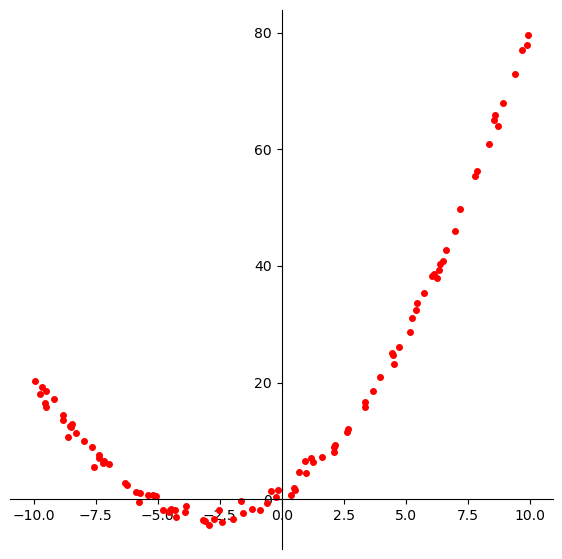

In [9]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
quad = np.array([1, 3, 0.5])
xquad = -10.0 + 20.0 * np.random.random(100)
yquad = quad[0] + (quad[1] * xquad) + (quad[2] * xquad * xquad) + np.random.randn(100)
ax.plot(xquad, yquad, 'ro', markersize = 4);

As a result, we wish to approximate the data by an equation of the form

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2.
$$

Let’s describe the linear model that produces a "least squares fit" of the data by the equation.

**Solution.** The ideal relationship is 

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2.
$$

Suppose the actual values of the parameters are $\beta_0, \beta_1, \beta_2$. Then the coordinates of the first data point satisfy the equation

$$
y_1 = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \epsilon_1
$$

where $\epsilon_1$ is the residual error between the observed value $y_1$ and the predicted $y$-value.

Each data point determines a similar equation:

$$
y_1 = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \epsilon_1
$$

$$
y_2 = \beta_0 + \beta_1 x_2 + \beta_2 x_2^2 + \epsilon_2
$$

$$
\vdots
$$

$$
y_n = \beta_0 + \beta_1 x_n + \beta_2 x_n^2 + \epsilon_n
$$

Clearly, this system can be written as:

$$
\mathbf{y} = X \boldsymbol{\beta} + \epsilon.
$$

$$
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = 
\begin{bmatrix} 
1 & x_1 & x_1^2 \\ 
1 & x_2 & x_2^2 \\ 
\vdots & \vdots & \vdots \\ 
1 & x_n & x_n^2 
\end{bmatrix}
\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{bmatrix}
+
\begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{bmatrix}
$$

In [35]:
#
# Input data are in the vectors xquad and yquad
#
# estimate the parameters of the linear model
#
m = np.shape(xquad)[0]
X = np.array([np.ones(m), xquad, xquad**2]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ yquad

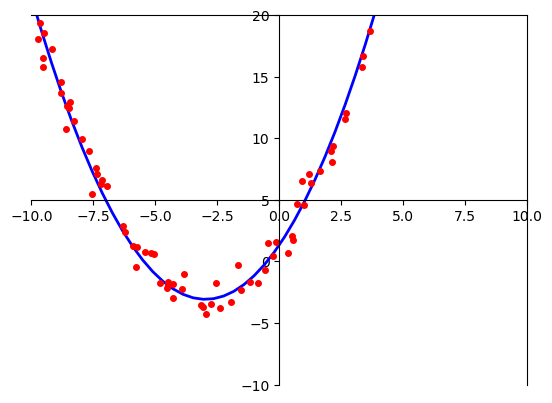

In [37]:
#
# plot the results
#
#ax = ut.plotSetup(-10, 10, -10, 20)
#ut.centerAxes(ax)
fig, ax = plt.subplots()
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 20])
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
xplot = np.linspace(-10, 10, 50)
yestplot = beta[0] + beta[1] * xplot + beta[2] * xplot**2
ax.plot(xplot, yestplot, 'b-', lw=2)
ax.plot(xquad, yquad, 'ro', markersize=4);

In [33]:
#
# Input data are in the vectors xlog and ylog
#
# estimate the parameters of the linear model
#
m2 = np.shape(xlog)[0]
X2 = np.array([np.ones(m), np.log(xlog)]).T
beta2 = np.linalg.inv(X.T @ X) @ X.T @ ylog

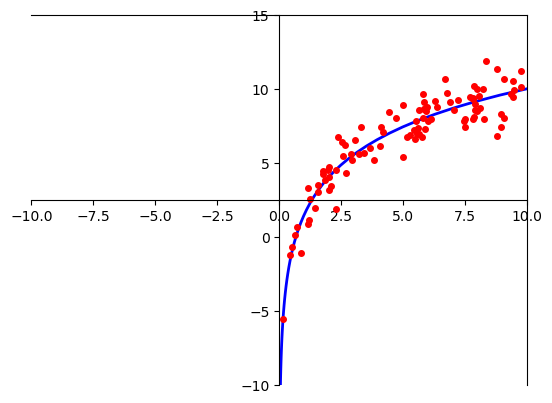

In [38]:
# 
# plot the results
#
fig2, ax2 = plt.subplots()
ax2.set_xlim([-10, 10])
ax2.set_ylim([-10, 15])
ax2.spines['left'].set_position('center')
ax2.spines['bottom'].set_position('center')
xplot2 = np.logspace(np.log10(0.0001),1,100)
yestplot2 = beta2[0]+beta2[1]*np.log(xplot2)
ax2.plot(xplot2,yestplot2,'b-',lw=2)
ax2.plot(xlog,ylog,'ro',markersize=4);

### Multiple Regression

Suppose an experiment involves two independent variables – say, $u$ and $v$ – and one dependent variable, $y$. A simple equation for predicting $y$ from $u$ and $v$ has the form

$$
y = \beta_0 + \beta_1 u + \beta_2 v
$$

Since there is more than one independent variable, this is called **multiple regression**.

A more general prediction equation might have the form

$$
y = \beta_0 + \beta_1 u + \beta_2 v + \beta_3 u^2 + \beta_4 uv + \beta_5 v^2
$$

A least squares fit to equations like this is called a **trend surface**.

In general, a linear model will arise whenever $y$ is to be predicted by an equation of the form

$$
y = \beta_0 f_0(u, v) + \beta_1 f_1(u, v) + \cdots + \beta_k f_k(u, v)
$$

with $f_0, \dots, f_k$ any sort of known functions and $\beta_0, \dots, \beta_k$ unknown weights.

Let’s take an example. Here are a set of points in $\mathbb{R}^3$: